In [473]:
import pandas as pd
import numpy as np

In [474]:
path = "llama_reg_predictions_Llama70B.txt"

In [475]:
sentiments = np.loadtxt(path)

In [476]:
data = pd.read_csv("engish_headlines_3_nnew.csv", encoding="latin-1")

In [477]:
open_prices = data[["Date", "open_price"]]

In [478]:
open_prices = open_prices.iloc[-365:]

In [479]:
open_prices

,Date,open_price
15792,1/18/2023,21139.80011
15793,1/19/2023,20672.60793
15794,1/19/2023,20672.60793
15795,1/19/2023,20672.60793
15796,1/19/2023,20672.60793
...,...,...
16152,2/24/2023,23945.40390
16153,2/24/2023,23945.40390
16154,2/24/2023,23945.40390
16155,2/24/2023,23945.40390


In [480]:
def simulation_trading(sentiments_input, open_prices_input, period_days = 1, transaction_cost = 0):
    spending = 0
    balance = 0
    balance_dollars = 100

    balances = []
    balances_dollars = []
    balances_db = []
    spendings = []
    open_prices_days = []
    previous = 0
    for index in range(len(sentiments_input)):
        sentiment = sentiments_input[index]

        open_price = open_prices_input.iloc[index][1]
        open_prices_days.append(open_price)

        if sentiment > 0:
            balance += balance_dollars/open_price

            balance_dollars = 0

            balances.append(balance)
            balances_dollars.append(balance_dollars)
            balances_db.append(balance*open_price)

            spending += transaction_cost

            spendings.append(transaction_cost)

        elif sentiment < 0:
            balance_dollars += balance*open_price
            balance = 0
            spending += transaction_cost

            spendings.append(transaction_cost)
            balances.append(balance)
            balances_dollars.append(balance_dollars)
            balances_db.append(balance*open_price)

        else:
            spendings.append(0)
            try:
                balances.append(balances[-1])
                balances_dollars.append(balance_dollars[-1])
                balances_db.append(balances[-1]*open_price)

            except:
                balances.append(0)
                balances_dollars.append(0)
                balances_db.append(0*open_price)

        # Оновлюємо змінну previous на кількість днів в періоді, щоб продовжувати ітерувати по наступному періоді потрібного розміру.
        previous += period_days

    if balance_dollars == 0:
        roi = ((balance*open_price - 100 - spending)/(spending+100))*100
    else:
        roi = ((balance_dollars - 100 - spending)/(spending+100))*100
    print(spending, balance_dollars, balance, balance*open_price, roi)
    return (open_prices_days, spending, balance_dollars, balance, balance*open_price, balances, balances_dollars, balances_db)

In [481]:
open_prices_days, _, _, _, _, balances, balances_D, balances_db = simulation_trading(sentiments, open_prices, 1, transaction_cost=0.00001)

C:\Users\Roman Kypybida\AppData\Local\Temp\ipykernel_4788\2385791399.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  open_price = open_prices_input.iloc[index][1]


0.0036500000000000087 110.17342160755719 0 0.0 10.169400424441696


In [482]:
import matplotlib.pyplot as plt

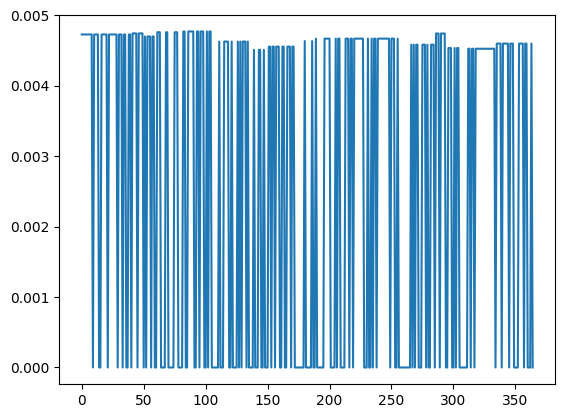

In [483]:
plt.plot(balances)

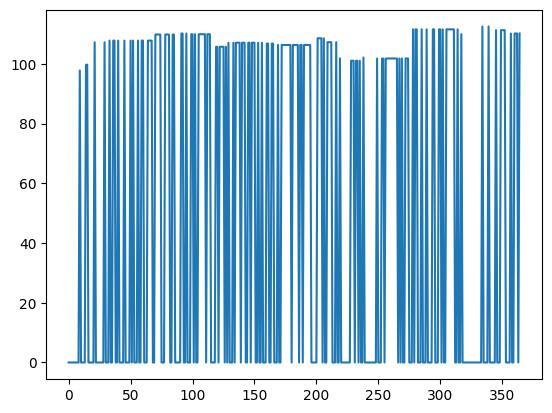

In [484]:
plt.plot(balances_D)

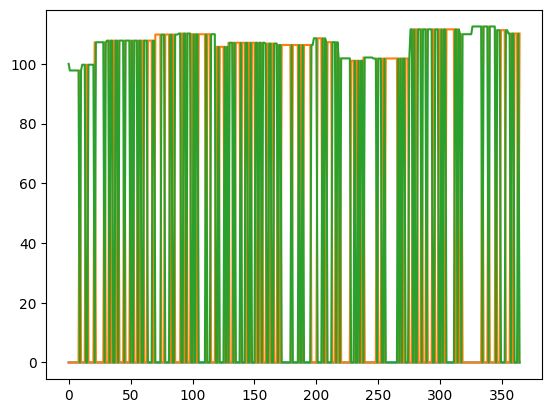

In [485]:
plt.plot(balances)
plt.plot(balances_D)
plt.plot(balances_db)
plt.show()

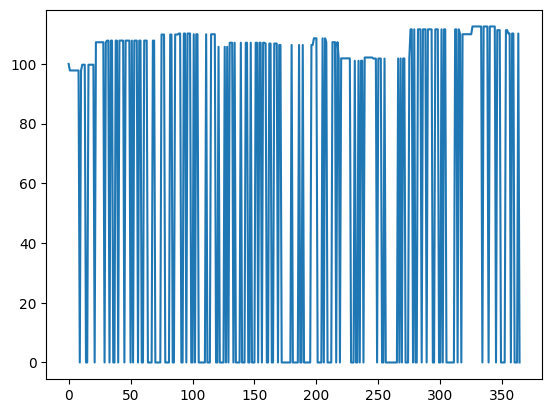

In [486]:
plt.plot(balances_db)

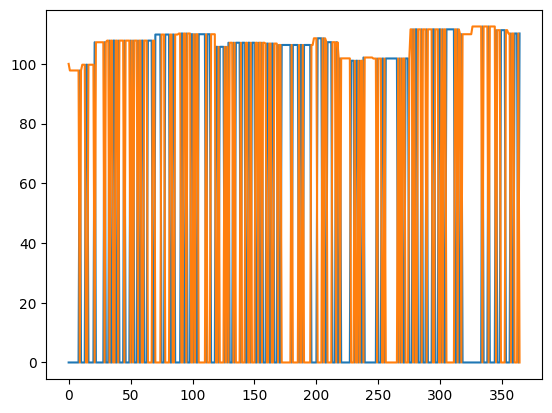

In [487]:
plt.plot(balances_D)
plt.plot(balances_db)

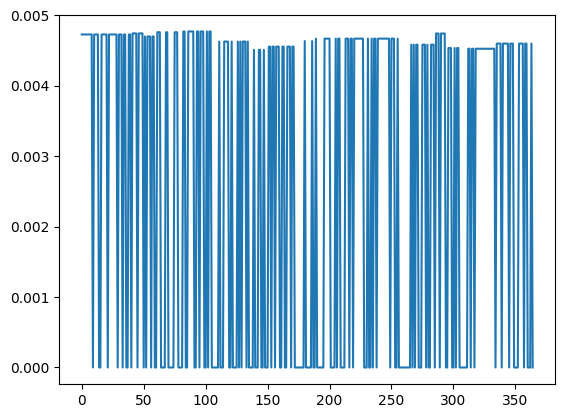

In [488]:
plt.plot(balances[:365])

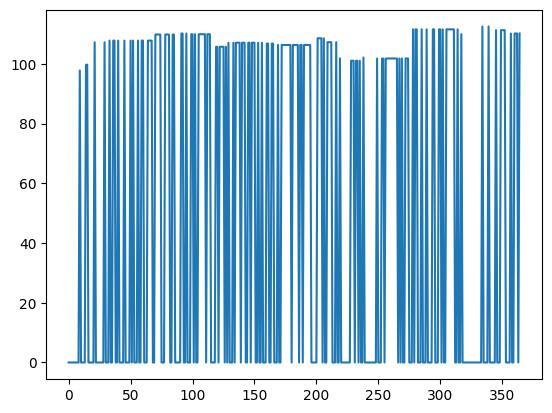

In [489]:
plt.plot(balances_D[:365])

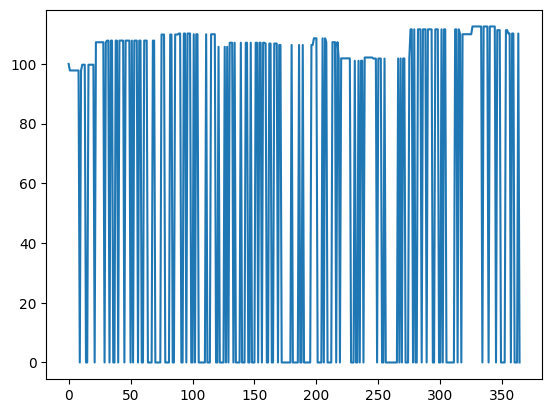

In [490]:
plt.plot(balances_db[:365])

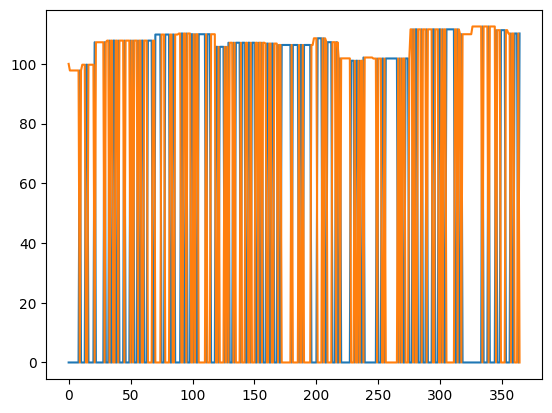

In [491]:
plt.plot(balances_D[:365])
plt.plot(balances_db[:365])